In [2]:
import eurostat
import pandas as pd

In [3]:
# table of contents of the main database
toc = eurostat.get_toc_df()
eurostat.subset_toc_df(toc, 'energy balances')

code = 'ten00123' #Final energy consumption by product
#Final energy consumption by sector (online data code: TEN00124 )

df = eurostat.get_data_df(code)

In [4]:
df.columns

Index([ 'nrg_bal',     'siec',     'unit', 'geo\time',       2009,       2010,
             2011,       2012,       2013,       2014,       2015,       2016,
             2017,       2018,       2019,       2020],
      dtype='object')

In [5]:
avail_sdmx_df= eurostat.get_avail_sdmx_df()
eurostat.subset_avail_sdmx_df(avail_sdmx_df, 'energy bal')

,name
dataflow,
enps_nrg_bal_c,Energy balance
env_ac_pefa05,Physical energy flow accounts totals bridging ...
nrg_bal_c,Complete energy balances
nrg_bal_s,Simplified energy balances


In [6]:
code = 'ten00123' # Final energy consumption by product
eurostat.get_sdmx_dims(code)

['FREQ', 'GEO', 'INDICATORS', 'NRG_BAL', 'OBS_FLAG', 'SIEC', 'TIME', 'UNIT']

In [7]:
eurostat.get_sdmx_dic(code, 'FREQ')

{'A': 'Annual',
 'D': 'Daily',
 'H': 'Half-year',
 'M': 'Monthly',
 'Q': 'Quarterly',
 'S': 'Semi-annual',
 'W': 'Weekly'}

In [21]:
eurostat.get_sdmx_dic(code, 'SIEC')

{'C0000X0350-0370': 'Solid fossil fuels',
 'C0350-0370': 'Manufactured gases',
 'E7000': 'Electricity',
 'G3000': 'Natural gas',
 'H8000': 'Heat',
 'N900H': 'Nuclear heat',
 'O4000XBIO': 'Oil and petroleum products (excluding biofuel portion)',
 'P1000': 'Peat and peat products',
 'RA000': 'Renewables and biofuels',
 'S2000': 'Oil shale and oil sands',
 'TOTAL': 'Total',
 'W6100_6220': 'Non-renewable waste'}

In [32]:
StartPeriod = 2010
EndPeriod = 2019
filter_pars={'FREQ':['A',], 'GEO':['TR',]}
sdf2 = eurostat.get_sdmx_data_df(code, StartPeriod, EndPeriod, filter_pars, flags=False, verbose=True)

Progress: 100.0%


In [33]:
sdf2

,SIEC,UNIT,NRG_BAL,GEO,FREQ,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,C0000X0350-0370,KTOE,FC_E,TR,A,14003.596,13105.748,13623.236,10636.487,10759.764,11403.943,11949.203,11793.866,9659.516,NaN
1,C0350-0370,KTOE,FC_E,TR,A,317.558,303.74,431.609,397.206,441.54,511.266,461.711,311.873,360.6,NaN
2,E7000,KTOE,FC_E,TR,A,14618.573,15820.55,16586.071,16867.412,17664.832,18443.766,19619.089,21143.117,21920.415,NaN
3,G3000,KTOE,FC_E,TR,A,12941.488,17418.551,17856.707,18875.903,19413.822,21151.806,21150.86,24763.11,24057.437,NaN
4,H8000,KTOE,FC_E,TR,A,1225.996,1216.132,1225.685,1212.525,1156.253,991.115,927.654,1034.22,993.911,NaN
5,N900H,KTOE,FC_E,TR,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,O4000XBIO,KTOE,FC_E,TR,A,21664.293,22571.546,23679.044,24563.786,25861.101,28671.118,30767.238,36218.259,36239.054,NaN
7,P1000,KTOE,FC_E,TR,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8,RA000,KTOE,FC_E,TR,A,6264.665,5639.82,5756.067,5913.466,5546.981,5673.963,5442.376,5210.561,4605.028,NaN
9,S2000,KTOE,FC_E,TR,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [36]:
sdf2.T

,0,1,2,3,4,5,6,7,8,9,10,11
SIEC,C0000X0350-0370,C0350-0370,E7000,G3000,H8000,N900H,O4000XBIO,P1000,RA000,S2000,TOTAL,W6100_6220
UNIT,KTOE,KTOE,KTOE,KTOE,KTOE,KTOE,KTOE,KTOE,KTOE,KTOE,KTOE,KTOE
NRG_BAL,FC_E,FC_E,FC_E,FC_E,FC_E,FC_E,FC_E,FC_E,FC_E,FC_E,FC_E,FC_E
GEO,TR,TR,TR,TR,TR,TR,TR,TR,TR,TR,TR,TR
FREQ,A,A,A,A,A,A,A,A,A,A,A,A
2010,14003.596,317.558,14618.573,12941.488,1225.996,NaN,21664.293,0.0,6264.665,0.0,71036.168,0.0
2011,13105.748,303.74,15820.55,17418.551,1216.132,NaN,22571.546,0.0,5639.82,0.0,76076.088,0.0
2012,13623.236,431.609,16586.071,17856.707,1225.685,NaN,23679.044,0.0,5756.067,0.0,79158.418,0.0
2013,10636.487,397.206,16867.412,18875.903,1212.525,NaN,24563.786,0.0,5913.466,0.0,78466.784,0.0
2014,10759.764,441.54,17664.832,19413.822,1156.253,NaN,25861.101,0.0,5546.981,0.0,80844.293,0.0


In [ ]:
ax = pt[cons][-10:].plot(kind='bar', stacked=True, figsize=(10,5), 
                         title='Total Energy consumption by fuel')
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')

In [27]:
sdf

,SIEC,UNIT,NRG_BAL,GEO,FREQ,2018,2017,2016,2015,2014,2013,2012,2011,2010
0,C0000X0350-0370,GWH,AFC,TR,A,109118.245,138161.149,134399.864,133919.339,128076.633,117299.673,157965.163,156013.131,161369.5
1,C0000X0350-0370,GWH,DL,TR,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C0000X0350-0370,GWH,EXP,TR,A,1725.667,2013.777,1825.119,1976.028,1540.607,1086.043,962.118,551.038,51.985
3,C0000X0350-0370,GWH,FC_E,TR,A,112340.171,137162.657,138969.23,132627.854,125136.055,123702.341,158438.235,152419.844,162861.823
4,C0000X0350-0370,GWH,FC_IND_CON_E,TR,A,304.444,0.0,14.167,21.903,0.0,0.0,15.668,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,W6100_6220,TJ,TO_GW,TR,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3308,W6100_6220,TJ,TO_LBB,TR,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3309,W6100_6220,TJ,TO_NSP,TR,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3310,W6100_6220,TJ,TO_PF,TR,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.iloc[0]

nrg_bal                 AFC
siec        C0000X0350-0370
unit                    GWH
geo\time                 AL
2019                    NaN
2018                2598.41
2017                1348.79
2016                589.976
2015                1105.79
2014                1005.41
2013                779.266
2012                898.126
2011                1616.27
2010                1289.77
2009                1168.82
2008                191.392
2007                147.645
2006                147.645
2005                147.645
2004                174.987
2003                125.772
2002                 87.493
2001                150.379
2000                128.506
1999                226.936
1998                133.974
1997                106.633
1996                308.961
1995                213.788
1994                459.514
1993                 525.54
1992                1067.47
1991                3816.95
1990                6644.09
Name: 0, dtype: object

In [11]:
eurostat.get_dic('siec')

{'TOTAL': 'Total',
 'CF': 'Combustible fuels',
 'CF_R': 'Combustible fuels - renewable',
 'CF_NR': 'Combustible fuels - non-renewable',
 'CF_NR_OTH': 'Combustible fuels - non-renewable - other',
 'FF': 'Fossil fuels',
 'SFF_P1000': 'Solid fossil fuels and peat',
 'SFF_P1000_S2000': 'Solid fossil fuels, peat, peat products, oil shale and oil sands',
 'C0000': 'Coal and manufactured gases',
 'C0000X0350-0370': 'Solid fossil fuels',
 'C0100': 'Hard coal',
 'C0110': 'Anthracite',
 'C0120': 'Bituminous coal',
 'C0121': 'Coking coal',
 'C0129': 'Other bituminous coal',
 'C0200': 'Brown coal',
 'C0210': 'Sub-bituminous coal',
 'C0220': 'Lignite',
 'C0300': 'Coal products',
 'C0310': 'Coal coke',
 'C0311': 'Coke oven coke',
 'C0312': 'Gas coke',
 'C0313': 'Coke breeze',
 'C0314': 'Semi cokes',
 'C0320': 'Patent fuel',
 'C0330': 'Brown coal briquettes',
 'C0340': 'Coal tar',
 'C0350-0370': 'Manufactured gases',
 'C0350': 'Coke oven gas',
 'C0360': 'Gas works gas',
 'C0370': 'Recovered gases',
 

In [99]:
df.rename(columns={'geo\\time': 'geo'}, inplace=True)

In [147]:
df[(df.geo =='TR') & (df.unit == 'TJ') &  (df.siec=='TOTAL') & (df.nrg_bal.isin(['PPRD','GAE','IMP', 'EXP']))][['nrg_bal',2015,2016,2017,2018]].round(0)

      nrg_bal       2015       2016       2017       2018
4493      EXP   364324.0   312123.0   330598.0   253159.0
51860     GAE  5577341.0  5883497.0  6334636.0  6240181.0
59465     IMP  4707769.0  4753120.0  5218910.0  4857818.0
92711    PPRD  1317145.0  1494911.0  1526771.0  1670807.0


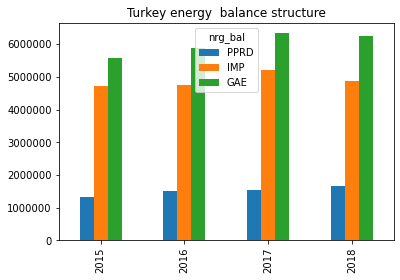

In [179]:
# nh=subset.T.iloc[0]
# ss2 = subset.T[1:]
# ss2.columns = nh
ax = ss2[['PPRD', 'IMP', 'GAE']].plot(kind='bar', stacked=False, title='Turkey energy  balance structure')
ax.ticklabel_format(style='plain', axis='y')


In [40]:
eurostat.get_dic('nrg_bal')

{'PRD': 'Production',
 'PPRD': 'Primary production',
 'PPRD_RED': 'Primary production - Renewable Energy Directive',
 'IPRD': 'Indigenous production',
 'IPRD_AG': 'Indigenous production - associated gas',
 'IPRD_NAG': 'Indigenous production - non-associated gas',
 'IPRD_CG': 'Indigenous production - colliery gas',
 'UPRD': 'Underground production',
 'SPRD': 'Surface production',
 'PRD_OTH': 'Other production',
 'TOS': 'Transfer from other sources',
 'TOS_OIL': 'Transfer from other sources - oil',
 'TOS_COAL': 'Transfer from other sources - coal',
 'TOS_REN': 'Transfer from other sources - renewables',
 'TOS_NGAS': 'Transfer from other sources - natural gas',
 'IDCO': 'Into direct carry-over',
 'FDCO': 'From direct carry-over',
 'RCV_RCY': 'Recovered and recycled products',
 'IMP': 'Imports',
 'IMP_NET': 'Net imports',
 'IMP_FROM_EU': 'Imports from EU',
 'IMP_FROM_NEU': 'Imports from outside EU',
 'EXP': 'Exports',
 'EXP_TO_EU': 'Exports to EU',
 'STKOP_NAT': 'Opening stocks on national

In [91]:
from eurostatapiclient import EurostatAPIClient

In [95]:
# EUROSTAT TABLES
VERSION = 'v2.1'
FORMAT = 'json'
LANGUAGE = 'en'
client = EurostatAPIClient(VERSION, FORMAT, LANGUAGE)
dataset = client.get_dataset('ten00124')
print(dataset.label)

df = dataset.to_dataframe()
print(df[df.geo =='TR'])

Final energy consumption by sector
          values      nrg_bal   siec  unit geo  time
468    71036.554         FC_E  TOTAL  KTOE  TR  2007
469    68297.946         FC_E  TOTAL  KTOE  TR  2008
470    67500.576         FC_E  TOTAL  KTOE  TR  2009
471    71036.168         FC_E  TOTAL  KTOE  TR  2010
472    76076.088         FC_E  TOTAL  KTOE  TR  2011
473    79158.418         FC_E  TOTAL  KTOE  TR  2012
474    78466.784         FC_E  TOTAL  KTOE  TR  2013
475    80844.293         FC_E  TOTAL  KTOE  TR  2014
476    86846.978         FC_E  TOTAL  KTOE  TR  2015
477    90318.129         FC_E  TOTAL  KTOE  TR  2016
478   100475.004         FC_E  TOTAL  KTOE  TR  2017
479    98634.008         FC_E  TOTAL  KTOE  TR  2018
984    24066.806     FC_IND_E  TOTAL  KTOE  TR  2007
985    17559.116     FC_IND_E  TOTAL  KTOE  TR  2008
986    18944.871     FC_IND_E  TOTAL  KTOE  TR  2009
987    22315.535     FC_IND_E  TOTAL  KTOE  TR  2010
988    24891.605     FC_IND_E  TOTAL  KTOE  TR  2011
989    2556

<AxesSubplot:>

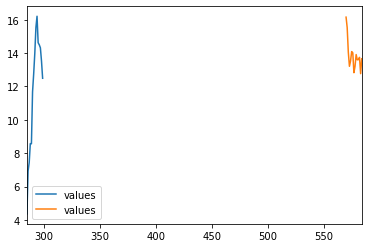

In [59]:
x = df[df.geo == 'HU'].plot()
df[df.geo == 'TR'].plot(ax = x);